In [5]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import imgaug.augmenters as iaa

# Set up directories for male and female images
male_dir = "E:\python files\Male"
female_dir = "E:\python files\Female"

# Preprocessing function to resize and preprocess images
def preprocess(img):
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten()
    return img

# Load male and female images into arrays and preprocess them
male_images = []
for img_file in os.listdir(male_dir):
    img = cv2.imread(os.path.join(male_dir, img_file))
    img = preprocess(img)
    male_images.append(img)

female_images = []
for img_file in os.listdir(female_dir):
    img = cv2.imread(os.path.join(female_dir, img_file))
    img = preprocess(img)
    female_images.append(img)

# Combine male and female images into a single dataset and labels array
X = np.concatenate((male_images, female_images))
y = np.concatenate((np.ones(len(male_images)), np.zeros(len(female_images))))

# Apply image augmentations to the dataset
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)), # blur images with a sigma of 0 to 3.0
    iaa.Affine(rotate=(-45, 45)), # rotate images by -45 to 45 degrees
    iaa.LinearContrast((0.75, 1.5)), # adjust contrast of images
    iaa.Multiply((0.8, 1.2)) # multiply pixel values with random values between 0.8 to 1.2
])

X_augmented = seq.augment_images(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y, test_size=0.2, random_state=42)

# Encode labels as integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train SVM model on training data
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Test SVM model on testing data and evaluate accuracy
y_pred = clf.predict(X_test)

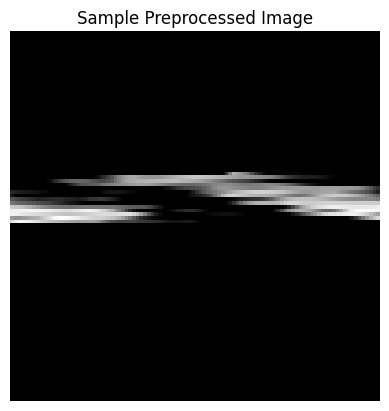

In [6]:
import matplotlib.pyplot as plt

# Select a random sample index
sample_index = np.random.randint(len(X_train))  # or len(X_test) for test dataset

# Retrieve the corresponding preprocessed image
sample_image = X_train[sample_index]  # or X_test[sample_index]

# Reshape the flattened image to its original shape
sample_image = sample_image.reshape((100, 100))

# Display the sample preprocessed image
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Preprocessed Image")
plt.axis('off')
plt.show()

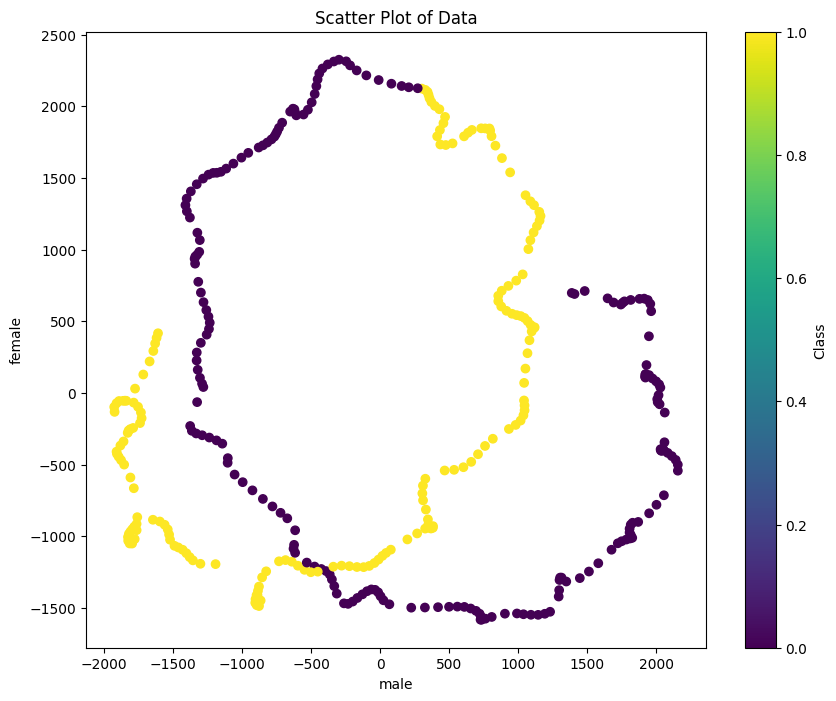

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title("Scatter Plot of Data")
plt.xlabel("male")
plt.ylabel("female")
plt.colorbar(label="Class")
plt.show()

In [3]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA


# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a DataFrame with the PCA results
df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df['Class'] = y_train

# Create scatter plot using Plotly
fig = px.scatter(df, x='PC1', y='PC2', color='Class', color_continuous_scale='viridis')

# Set plot labels and title
fig.update_layout(
    title="Scatter Plot of Data",
    xaxis_title="PC1",
    yaxis_title="PC2"
)

# Show the plot
fig.show()

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB

In [8]:
models = {
    "Logistic Regression": LogisticRegression(C=0.1),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=10),
    "Gradient Boosting": GradientBoostingClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "SVM (Gamma='scale')": SVC(gamma='scale'),
    "SVM (Gamma='auto')": SVC(gamma='auto'),
    "NuSVM": NuSVC(),
    "Linear SVM": LinearSVC(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTreeClassifier (max_depth=5)": DecisionTreeClassifier(max_depth=5)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results.append([name, train_acc, test_acc, f1, precision, recall])

df_results = pd.DataFrame(results, columns=["Model Name", "Training Accuracy", "Test Accuracy", "F1 Score", "Precision", "Recall"])

c:\Users\Ranil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Ranil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
df_results

In [9]:
for name, conf_matrix in conf_matrices.items():
    class_names = np.unique(y_test)
    z_text = [[str(y) for y in x] for x in conf_matrix]

    fig = go.Figure(data=go.Heatmap(
        z=conf_matrix,
        x=class_names,
        y=class_names,
        colorscale='Viridis',
        text=z_text,
        hoverinfo='text'
    ))

    fig.update_layout(
        title=f'Confusion Matrix - {name}',
        xaxis_title="Predicted Label",
        yaxis_title="True Label",
        xaxis=dict(tickangle=-45),
        yaxis=dict(tickangle=0),
    )

    fig.show()

NameError: name 'conf_matrices' is not defined

Epoch 1/40
11/11 [==============================] - 1s 6ms/step - loss: 0.8502 - accuracy: 0.7331
Epoch 2/40
11/11 [==============================] - 0s 6ms/step - loss: 0.4793 - accuracy: 0.8436
Epoch 3/40
11/11 [==============================] - 0s 6ms/step - loss: 0.2598 - accuracy: 0.9202
Epoch 4/40
11/11 [==============================] - 0s 6ms/step - loss: 0.1760 - accuracy: 0.9540
Epoch 5/40
11/11 [==============================] - 0s 6ms/step - loss: 0.1536 - accuracy: 0.9724
Epoch 6/40
11/11 [==============================] - 0s 7ms/step - loss: 0.1433 - accuracy: 0.9479
Epoch 7/40
11/11 [==============================] - 0s 6ms/step - loss: 0.1250 - accuracy: 0.9755
Epoch 8/40
11/11 [==============================] - 0s 6ms/step - loss: 0.1255 - accuracy: 0.9693
Epoch 9/40
11/11 [==============================] - 0s 6ms/step - loss: 0.0472 - accuracy: 0.9877
Epoch 10/40
11/11 [==============================] - 0s 7ms/step - loss: 0.0214 - accuracy: 0.9908
Epoch 11/40
11/11 [

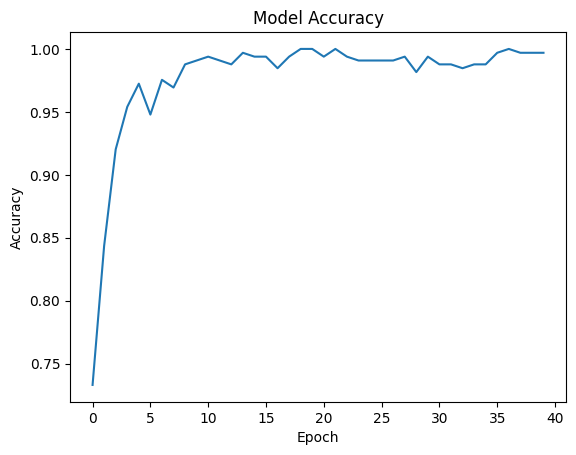

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store accuracy history
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, verbose=1)

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test_scaled)

# Convert probabilities to classes
y_pred_classes = np.where(y_pred_probs > 0.5, 1, 0)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Plot accuracy vs. epoch
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [11]:
import plotly.graph_objects as go
fig = go.Figure()

# Add the accuracy trace
fig.add_trace(go.Scatter(x=np.arange(1, len(history.history['accuracy']) + 1),
                         y=history.history['accuracy'],
                         mode='lines',
                         name='Accuracy'))

# Update layout
fig.update_layout(title='Model Accuracy',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

# Show the plot
fig.show()

In [13]:
# Train the model and store accuracy history
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/40
9/9 [==============================] - 0s 23ms/step - loss: 2.4813e-04 - accuracy: 1.0000 - val_loss: 4.8048e-05 - val_accuracy: 1.0000
Epoch 2/40
9/9 [==============================] - 0s 9ms/step - loss: 2.3973e-04 - accuracy: 1.0000 - val_loss: 5.6415e-05 - val_accuracy: 1.0000
Epoch 3/40
9/9 [==============================] - 0s 10ms/step - loss: 4.2771e-04 - accuracy: 1.0000 - val_loss: 6.2193e-05 - val_accuracy: 1.0000
Epoch 4/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 4.7252e-05 - val_accuracy: 1.0000
Epoch 5/40
9/9 [==============================] - 0s 9ms/step - loss: 1.0310e-04 - accuracy: 1.0000 - val_loss: 3.6433e-05 - val_accuracy: 1.0000
Epoch 6/40
9/9 [==============================] - 0s 9ms/step - loss: 8.2042e-04 - accuracy: 1.0000 - val_loss: 2.5173e-05 - val_accuracy: 1.0000
Epoch 7/40
9/9 [==============================] - 0s 8ms/step - loss: 7.6171e-04 - accuracy: 1.0000 - val_loss: 1.8522e-05 - v

In [14]:
validation_accuracy = history.history['val_accuracy']

# Create an interactive plot using Plotly
fig = go.Figure()

# Add the validation accuracy trace
fig.add_trace(go.Scatter(x=np.arange(1, len(validation_accuracy) + 1),
                         y=validation_accuracy,
                         mode='lines',
                         name='Validation Accuracy'))

# Update layout
fig.update_layout(title='Validation Accuracy',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

# Show the plot
fig.show()

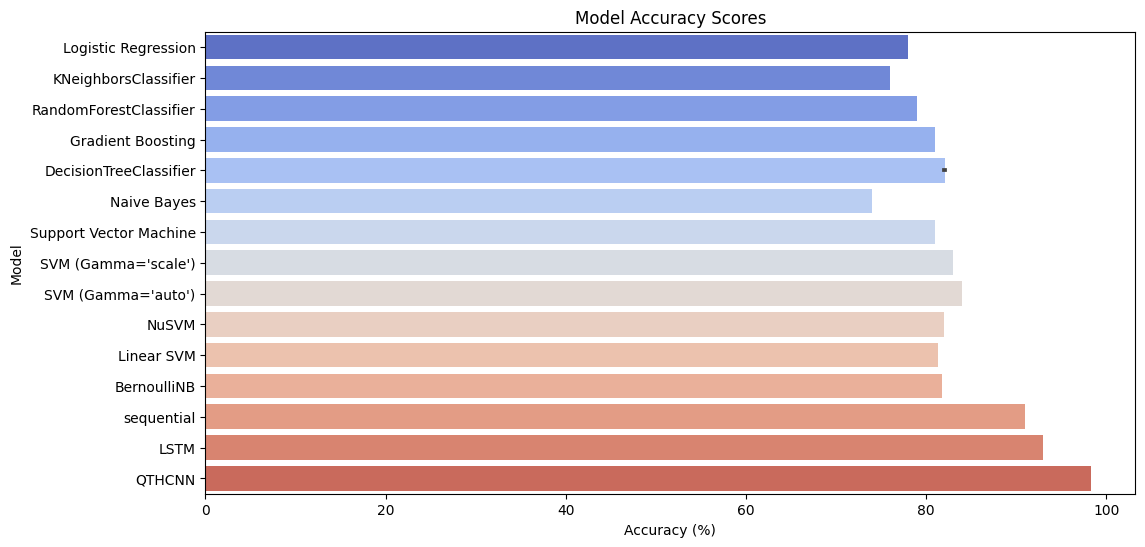

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model names and their corresponding accuracy scores
models = [
    "Logistic Regression", "KNeighborsClassifier", "RandomForestClassifier",
    "Gradient Boosting", "DecisionTreeClassifier", "Naive Bayes",
    "Support Vector Machine", "SVM (Gamma='scale')", "SVM (Gamma='auto')",
    "NuSVM", "Linear SVM", "BernoulliNB", "DecisionTreeClassifier",
    "sequential","LSTM" , "QTHCNN"
]

accuracy_scores = [
    78, 76, 79, 81, 82, 74, 81, 83, 84, 82, 81.3, 81.7, 82.1, 91,93, 98.3
]

# Set a color palette for the bars
colors = sns.color_palette("coolwarm", len(models))

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=accuracy_scores, y=models, palette=colors)

# Add labels and a title
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("Model Accuracy Scores")

# Show the plot
plt.show()

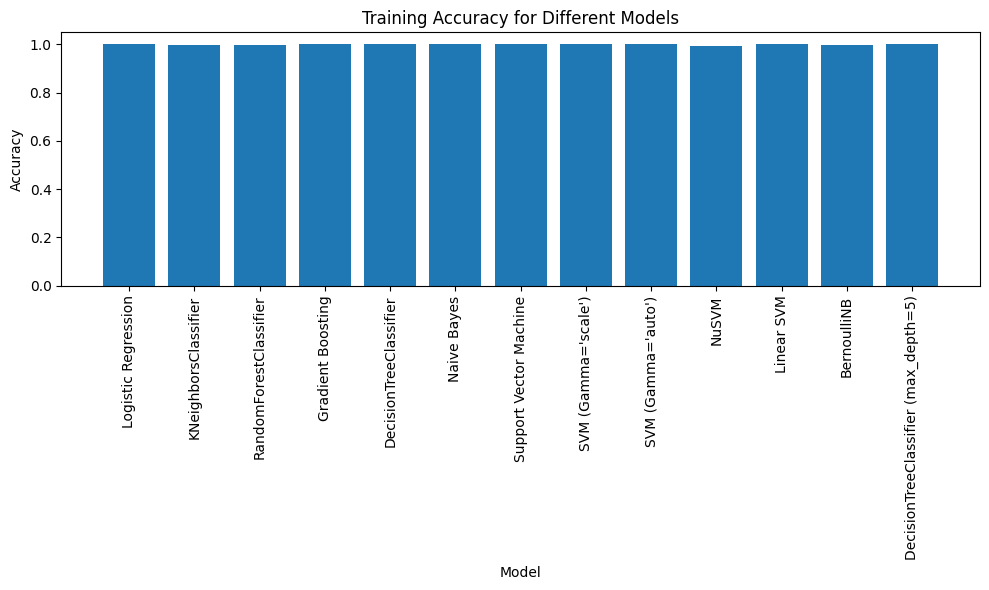

In [15]:
# Plotting Training Accuracy
plt.figure(figsize=(10, 6))
plt.bar(df_results["Model Name"], df_results["Training Accuracy"])
plt.title("Training Accuracy for Different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
fig = go.Figure(data=[go.Bar(x=df_results["Model Name"], y=df_results["Training Accuracy"])])

# Update layout
fig.update_layout(title="Training Accuracy for Different Models",
                  xaxis_title="Model",
                  yaxis_title="Accuracy",
                  xaxis_tickangle=-45,
                  bargap=0.2)

# Show the plot
fig.show()

In [ ]:
# Plotting Test Accuracy
plt.figure(figsize=(10, 6))
plt.bar(df_results["Model Name"], df_results["Test Accuracy"])
plt.title("Test Accuracy for Different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=df_results["Model Name"], y=df_results["Test Accuracy"])])

# Update layout
fig.update_layout(title="Test Accuracy for Different Models",
                  xaxis_title="Model",
                  yaxis_title="Accuracy",
                  xaxis_tickangle=-45,
                  bargap=0.2)

# Show the plot
fig.show()

In [ ]:
def load_and_preprocess_image(file_path):
    img = cv2.imread(file_path)
    img = preprocess(img)
    img = cv2.resize(img, (100, 100))  # Resize to (100, 100)
    img = img.reshape(1, -1)  # Reshape to (1, 10000)
    return img

# Path to the new image
new_image_path = r"E:\python files\Female\image_006.jpeg"
new_image = load_and_preprocess_image(new_image_path)
new_image_augmented = seq.augment_images([new_image])
augmented_image = new_image_augmented[0]
new_image_reshaped = augmented_image.reshape(1, -1)
prediction = clf.predict(new_image_reshaped)
if prediction[0] == 1:
    predicted_label = "male"
else:
    predicted_label = "female"
print("Predicted label:", predicted_label)

### MIKKA NANDRI GUYCH